In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from subprocess import run, PIPE

In [2]:
nbfolder = get_ipython().starting_dir
def path(*xs):
    return os.path.join(nbfolder, '..', *xs)

### Running algorithm

In [3]:
instances = ['A-n32-k5','A-n33-k5','A-n34-k5','A-n36-k5','A-n37-k5','A-n38-k5','A-n39-k6',\
             'A-n44-k6','A-n45-k6','A-n46-k7','A-n48-k7','A-n53-k7','A-n54-k7','A-n55-k9',\
             'A-n60-k9','A-n61-k9','A-n62-k8','A-n63-k10','A-n64-k9','A-n65-k9','A-n69-k9',\
             'A-n80-k10']
executable = 'savings_time'
repeats = 20

In [4]:
os.makedirs(path('out'), exist_ok=True)

filenames_in = [path('instances', instance+'.vrp') for instance in instances]

In [5]:
times = []
for filename_in in filenames_in:
    total_time = 0
    for r in range(repeats):
        with open(filename_in, 'r') as file_in:
            output = run(path('bin', executable), check=True, text=True, stdin=file_in, stdout=PIPE).stdout
            total_time += int(output)
    time = total_time/repeats
    times.append(time)

### Reading Input

In [6]:
dimensions = []
for filename_in in filenames_in:
    with open(filename_in, 'r') as file_in:
        lines_in = [s.strip() for s in file_in.readlines()]
        dimension = int(lines_in[3].split()[-1:][0])
        dimensions.append(dimension)

### Plotting Solution

Text(0,0.5,'Time(ns)')

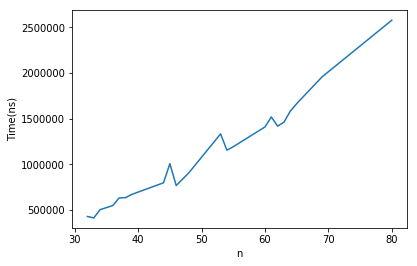

In [7]:
plt.plot(dimensions, times)
plt.xlabel('n')
plt.ylabel('Time(ns)')